In [1]:
from datetime import date,timedelta
from nsepy import get_history
import numpy as np
import pandas as pd
from pandas import datetime

In [2]:
days_diff = 365
strt = date(2015,1,1)
ends = strt+timedelta(days=days_diff)
sbin = get_history(symbol='SBIN',
                    start= strt,
                    end=ends)

# sbin['Date'] = sbin.index
sbin = sbin.reset_index()

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
# %pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

In [4]:
sbin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059
1,2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249
2,2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208
3,2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844
4,2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743


In [5]:
sbin.shape

(249, 15)

In [6]:
sbin["Date"] = pd.to_datetime(sbin["Date"])

In [7]:
def moving_average(values,size):
    weights = np.repeat(1.0, size)/size
    smas = np.convolve(values,weights,'valid')
    print(type(smas))
    return smas

In [8]:
# size_arr = [4,16,28,40,52]
# colors = ['green','blue','black','red','brown']
# movin = []
# # plt.plot(sbin.index,sbin["Close"],color = 'cyan')
# for i in range(len(size_arr)):
#     movin.append(moving_average(sbin["Close"],7*size_arr[i]))
# #     print(type(movin[-1]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


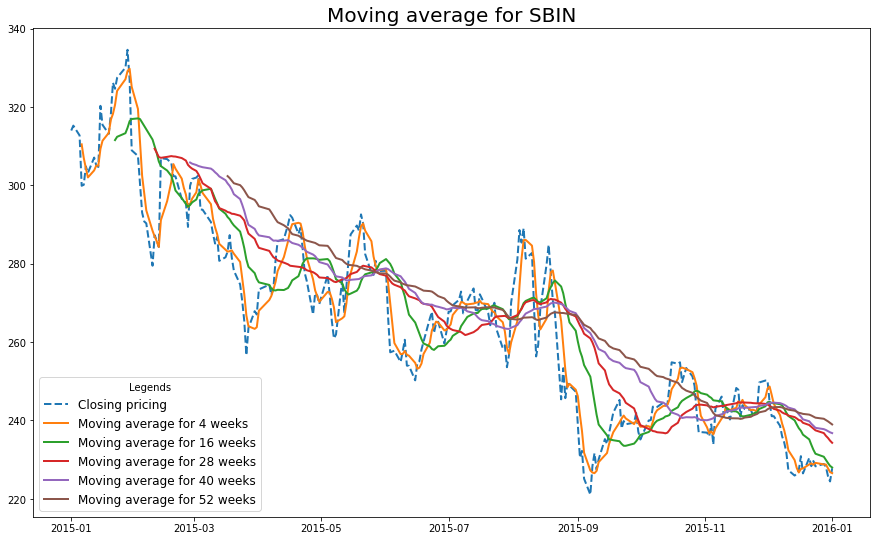

In [27]:
size_arr = [4,16,28,40,52]
# colors = ['green','blue','black','red','brown']
moving_avg = {}
# moving_avg["Date"] = sbin["Date"]
plt.title("Moving average for SBIN",fontsize=20)
plt.plot(sbin["Date"],sbin["Close"],label="Closing pricing",linestyle='--',linewidth=2)
# plt.plot(title="Moving average for SBIN")
# plt.show()
for i in range(len(size_arr)):
    a = [None for i in range(size_arr[i]-1)]
    a = np.array(a)
#     print(a.shape)
    moving_avg[size_arr[i]] = np.hstack([a,moving_average(sbin["Close"],size_arr[i])])
#     print(size(moving_avg[size_arr[i]]))
#     movin.append(moving_average(sbin["Close"],size_arr[i]))
    name = "Moving average for "+str(size_arr[i])+" weeks"
    plt.plot(sbin["Date"],moving_avg[size_arr[i]],label = name,linewidth=2)
plt.legend(title = "Legends",loc = 3,prop={'size': 12})
plt.show()
# moving_avg.head()